## Project Overview

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
mushrooms = pd.read_csv("resources/mushrooms.csv")

In [4]:
mushrooms

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [5]:
mushrooms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

## Data has two classed of mushrooms 
- This will be perfect for a logistic Regression Model 
- Will need to convert this to dummy values for the model 
- Since all columns are not Numeric we will need to convert all columns for the model

In [6]:
mushrooms.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [9]:
mushrooms.head(5)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [8]:
mushrooms.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

## will convert ecah featire to a dummy/one hot encode to get numeric values for the model.
- Class will be our target variable

In [13]:
mushrooms["class"] =pd.get_dummies(mushrooms["class"], drop_first=True)

In [18]:
cap_Shape = pd.get_dummies(mushrooms["cap-shape"], drop_first=True)

In [21]:
cap_surface = pd.get_dummies(mushrooms["cap-surface"], drop_first=True)

In [23]:
cap_color = pd.get_dummies(mushrooms["cap-color"], drop_first=True)

In [25]:
bruises = pd.get_dummies(mushrooms["bruises"], drop_first=True)

In [27]:
odor = pd.get_dummies(mushrooms["odor"], drop_first=True)

In [29]:
gill_attachment = pd.get_dummies(mushrooms["gill-attachment"], drop_first=True)

In [31]:
gill_spacing = pd.get_dummies(mushrooms["gill-spacing"], drop_first=True)

In [33]:
grill_size = pd.get_dummies(mushrooms["gill-size"], drop_first=True)

In [35]:
grill_color = pd.get_dummies(mushrooms["gill-color"], drop_first=True)

In [37]:
stalk_shape = pd.get_dummies(mushrooms["stalk-shape"], drop_first=True)

In [39]:
stalk_root = pd.get_dummies(mushrooms["stalk-root"], drop_first=True)

In [41]:
stalk_surface_above_ring = pd.get_dummies(mushrooms["stalk-surface-above-ring"], drop_first=True)

In [43]:
stalk_surface_below_ring = pd.get_dummies(mushrooms["stalk-surface-below-ring"], drop_first=True)

In [45]:
veil_type = pd.get_dummies(mushrooms["veil-type"], drop_first=True)

In [47]:
veil_color = pd.get_dummies(mushrooms["veil-color"], drop_first=True)

In [49]:
ring_number = pd.get_dummies(mushrooms["ring-number"], drop_first=True)

In [51]:
ring_type = pd.get_dummies(mushrooms["ring-type"], drop_first=True)

In [53]:
sport_print_color = pd.get_dummies(mushrooms["spore-print-color"], drop_first=True)

In [55]:
population = pd.get_dummies(mushrooms["population"], drop_first=True)

In [57]:
habitat = pd.get_dummies(mushrooms["habitat"], drop_first=True)

In [59]:
stalk_color_above_ring = pd.get_dummies(mushrooms["stalk-color-above-ring"], drop_first=True)

In [61]:
stalk_color_below_ring= pd.get_dummies(mushrooms["stalk-color-below-ring"], drop_first=True)

### Concatination data together

In [64]:
feature_dummies = pd.concat([cap_Shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing, grill_size,
          grill_color, stalk_shape,stalk_root,stalk_surface_above_ring, stalk_surface_below_ring,
          veil_type,veil_color, ring_number,ring_type,sport_print_color, population,habitat,
          stalk_color_above_ring,stalk_color_below_ring], axis=1)

In [66]:
feature_dummies["Class"]= mushrooms["class"]

In [67]:
feature_dummies

,c,f,k,s,x,g,s,y,c,e,...,y,c,e,g,n,o,p,w,y,Class
0,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,1
1,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,1
4,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8120,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8121,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8122,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,1


### Setting up data for pocessing
- Will need to check if we are missing any data first 

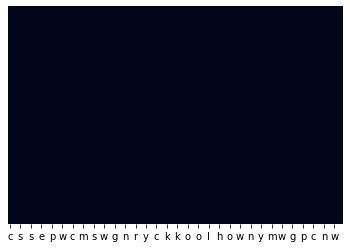

In [70]:
sns.heatmap(feature_dummies.isnull(), yticklabels=False, cbar=False)

In [71]:
X = feature_dummies.drop("Class", axis=1)
y = feature_dummies["Class"]

### Training testing and Splitting

In [72]:
from sklearn.model_selection import train_test_split

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

## Model Creation

In [76]:
from sklearn.linear_model import LogisticRegression

In [77]:
model = LogisticRegression()

## Fitting model

In [78]:
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## Prediction

In [79]:
prediction = model.predict(X_test)

In [80]:
prediction

array([1, 0, 1, ..., 0, 0, 1], dtype=uint8)

## Metrics

In [81]:
from sklearn.metrics import classification_report, confusion_matrix

In [82]:
print(confusion_matrix(y_test, prediction))

[[1274    0]
 [   1 1163]]


In [83]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1274
           1       1.00      1.00      1.00      1164

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438

